In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import os
from distutils.util import strtobool

from analysis.utils import create_folder
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import argparse

In [119]:
# Global settings for MatPlotlib
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
plt.rcParams["axes.labelpad"]='10'

Setting the path to the individual parquet files to load from for the Pandas data frames

In [59]:
data_value_fn_1 = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/Interpretability/function1/episodic_returns.parquet.gz"
data_value_fn_2 = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/Interpretability/function2/episodic_returns.parquet.gz"
data_value_fn_3 = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/Interpretability/function3/episodic_returns.parquet.gz"
data_baseline = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/EpisodicReturns50/FluidFlow/SKVI/episodic_returns.parquet.gz"

Loading all 4 value functions, and their episodic returns into their respective data frames

In [62]:
# Loading of the value functions
value_fn1_dataframe = pd.read_parquet(data_value_fn_1)
value_fn2_dataframe = pd.read_parquet(data_value_fn_2)
value_fn3_dataframe = pd.read_parquet(data_value_fn_3)

# Loading of the baseline
baseline_dataframe = pd.read_parquet(data_baseline)

Used plotting command for the style of the plot we want

```bash
rl_plotter --show --save --avg_group --shaded_err --shaded_std --filename q --filters Walker HalfCheetah --ykey bias real_q --yduel --style default --smooth 0
```

Import settings

In [ ]:
fig_length=6
fig_width=6
style=None
title=None
xlabel=None
ylabel=None
xkey='l'
ykey=['r']
yduel=False
xscale=1
smooth_radius=0
resample=0
smooth_step=1.0
average_group=False
shaded_std=True
shaded_err=False
legend_outside=False
legend_loc=0
legend_group_num=True
legend_borderpad=1.0
legend_labelspacing=1.0

In [87]:
# Universal index
xs = baseline_dataframe.index

In [88]:
# Values for the baseline
ymean_baseline = baseline_dataframe.mean(axis=1)
ystd_baseline = baseline_dataframe.std(axis=1)

In [90]:
# Values for function 1
ymean_fn1 = value_fn1_dataframe.mean(axis=1)
ystd_fn1 = value_fn1_dataframe.std(axis=1)

In [91]:
# Values for function 2
ymean_fn2 = value_fn2_dataframe.mean(axis=1)
ystd_fn2 = value_fn2_dataframe.std(axis=1)

In [92]:
# Values for function 3
ymean_fn3 = value_fn3_dataframe.mean(axis=1)
ystd_fn3 = value_fn3_dataframe.std(axis=1)

Text(-0.1, 0.5, 'Episodic Return')

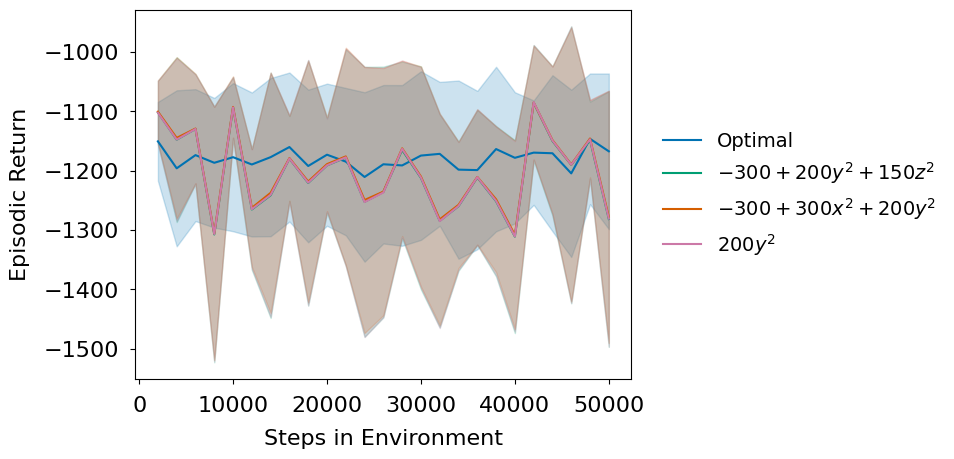

In [140]:
# Plot the baseline
legend, = plt.plot(xs, ymean_baseline, color='#0072B2', label="Optimal")
plt.fill_between(xs, ymean_baseline - ystd_baseline, ymean_baseline + ystd_baseline, color='#0072B2', alpha=.2)

# Plot function 1
plt.plot(xs, ymean_fn1, color='#009E73', label=r'$-300 + 200 y^{2} + 150 z^{2}$')
plt.fill_between(xs, ymean_fn1 - ystd_fn1, ymean_fn1 + ystd_fn1, color='#009E73', alpha=.2)

# Plot function 2
plt.plot(xs, ymean_fn2, color='#D55E00', label=r'$-300 + 300 x^{2} + 200 y^{2}$')
plt.fill_between(xs, ymean_fn2 - ystd_fn2, ymean_fn2 + ystd_fn2, color='#D55E00', alpha=.2)

# Plot function 3
plt.plot(xs, ymean_fn3, color='#CC79A7', label=r'$200 y^{2}$')
plt.fill_between(xs, ymean_fn3 - ystd_fn3, ymean_fn3 + ystd_fn3, color='#CC79A7', alpha=.2)

# Legend
plt.legend(loc='center right', bbox_to_anchor=(1.65, 0.5), ncol=1, fontsize=14, frameon=False)

# X, and Y label
plt.xlabel("Steps in Environment", fontsize=16, y=0.1)
plt.ylabel("Episodic Return", fontsize=16, x=-0.1)
